# F20DL Group 17 ML Portfolio

# Week 1
Overview: We shortlisted datasets to work on for the rest of the semester.

## Short-listed Tabular Datasets:
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
    - <font color='#90ee90'> 721 entries and 23 attributes for each entry, a mix of nominal and numerical data. </font>
    - <font color='#90ee90'> There are only 2 attributes with over 50% null values, can be easily cleaned
    and still lots of other attributes </font>
    - <font color='#90ee90'> The dataset is 732Kb, so it does not use a lot of space. </font>
   <br></br>
2. **Netflix Movies and TV Shows** - [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
    - <font color='#90ee90'> Pros:  8807 records with 12 attributes covering all data types (nominal/interval/ratio/ordinal data)</font>
    - <font color='#90ee90'> The dataset is 3.4MB.</font>
    - <font color='#FF7F7F'> 30% of records have null values for a certain attribute - field can be removed or records can be removed (leaving 6000 records) </font>
    <br></br>
3. **Video Game Sales** - [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 16500+ records</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#FF7F7F'>Has a limited number of attributes</font>

## Short-listed Computer Vision Datasets

4. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 90000+ high-quality images of over 100 different classes</font>
    - <font color='#90ee90'>The dataset consist of good quality, bad quality, and mixed quality fruit images</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#90ee90'>The dataset has lots of training data which might result in better accuracy</font>
    - <font color='#FF7F7F'>The data might require GPUs for training due to the sheer size of the dataset</font>
    <br></br>
5. **Pokemon Image Dataset** - [Kaggle](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)
    - <font color='#90ee90'>Has images of *all* of the Pokemon from generation 1 to 7</font>
    - <font color='#90ee90'>810 files/images to identify next evolution from the pre-evoled forms of the current Pokemon</font>
    - <font color='#90ee90'>Each Pokemon has two types, primary and secondary. The dataset helps predict the current type of the Pokemon image</font>
    - <font color='#FF7F7F'>Only 3 columns in the dataset, Pokemon, Type1, Type2</font>
    - <font color='#FF7F7F'>Type 2 has 50% null values, meaning half the Pokemons only have type1 which makes the identification pointless</font>
    - <font color='#FF7F7F'>Data is not uniform, the image resolutions are different which can result in conflicts during data analysis</font>


## Selected Dataset:
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
    - For nominal analysis
2. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
    - For any CNN related tasks.

# Week 2
Overview: We visualised and summarised the pokemon data, in order to be aquainted with it.

## 1. Imported required packages

In [2]:
# Some required imports
import sys
assert sys.version_info >= (3,5)    # Python >= 3.5 is required

In [3]:
import sklearn
assert sklearn.__version__ >= "0.2"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## 2. We loaded the dataset, described the attributes, and generated summary statistics.

In [4]:
# Reads the CSV
pokemon = pd.read_csv('pokemon_alopez247.csv')
# This displays the top 5 entries, showing its 23 attributes
pokemon.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


### Attribute Description of the Dataset

This database includes 721 Pokémon records from first six generations, with 23 attributes.

- **Number**: Unique identifier.
- **Name**: Pokémon name.
- **Type_1**: Primary type.
- **Type_2**: Second type, in case the Pokémon has it.
- **Total**: Sum of base stats (health points, attack, defense, special attack, special defense, and speed).
- **HP**: Base health points.
- **Attack**: Base attack.
- **Defense**: Base defense.
- **Sp_Atk**: Base special attack.
- **Sp_Def**: Base special defense.
- **Speed**: Base speed.
- **Generation**: Generation when the Pokémon was introduced. Ranges from 1 to 6.
- **isLegendary**: Boolean that indicates whether the Pokémon is Legendary or not.
- **Color**: Color of the Pokémon.
- **hasGender**: Boolean that indicates if the Pokémon can be classified as female or male.
- **Pr_male**: If the Pokémon has gender, the probability of being male. The probability of being female is 1 minus this value.
- **EggGroup1**: Egg group of the Pokémon.
- **EggGroup2**: Second egg group of the Pokémon, if it has two.
- **hasMegaEvolution**: If the Pokémon is able to Mega-evolve or not. Boolean value.
- **Height_m**: Pokémon height (m)
- **Weight_kg**: Pokémon weight (kg)
- **Catch_Rate**: Probability of the Pokémon being caught when a Pokéball is thrown at it.
- **Body_Style**: Body style of the Pokémon. E.g., Quadruped.

In [5]:
# Displays the type and number of nulls of each attribute
# Note: Almost 0.5 of Type 2 attributes are null, because Type 2 is not a required attribute is an optional add-on. 
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [6]:
# Generated summary statistics for the numerical attributes of the dataset
# It is not a complete dataset becuase there are some null values, which is to be dealt with in the next step.
pokemon.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<AxesSubplot:>

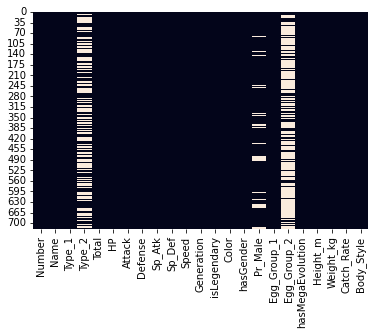

In [7]:
# Indicates where the null values are, within the dataset.
sns.heatmap(pokemon.isnull(), cbar=False)

## 3. Dealt with null values

We replaced the null values with another arbitrary value as they are meaningful.

Attributes will nulls and why they have nulls:

1. *Type_2* has around 50% null values as some Pokemons do not have a second type. Removing all the rows with this as null would reduce our dataset to 50% of the size. Removing this column ends the possibility of identifying and analysising the Pokemon's second type. Replacing this as a string called "None" solves our problem.

2. *Egg_Group_2* has around 75% null value as some Pokemons have only one egg group. Removing all the rows with this as null would reduce our dataset to 25% of the size. Removing this column again ends the possibility of indentifying and analysising the Pokemon's second egg group. Replacing this as a string called "None" solves our problem.

3. *Pr_Male* has around 11% null values, these Pokemons do not have a gender. Removing these rows or columns will cost us the possibility of identifying and predicting the Pokemon's gender. Replacing this with 999 signifies as the Pokemon as genderless.

In [8]:
# dealing with null values 

# changing null values of Type_2 to string "None"
pokemon['Type_2'].fillna("None", inplace = True)
# changing null values of Egg_Group_2 to string "None"
pokemon['Egg_Group_2'].fillna("None", inplace = True)
# changing null values of Pr_Male to 999
pokemon['Pr_Male'].fillna(999, inplace = True)

# Now there are no more null values.
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            721 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

## 4. Visualising again, now with a complete dataset

<AxesSubplot:>

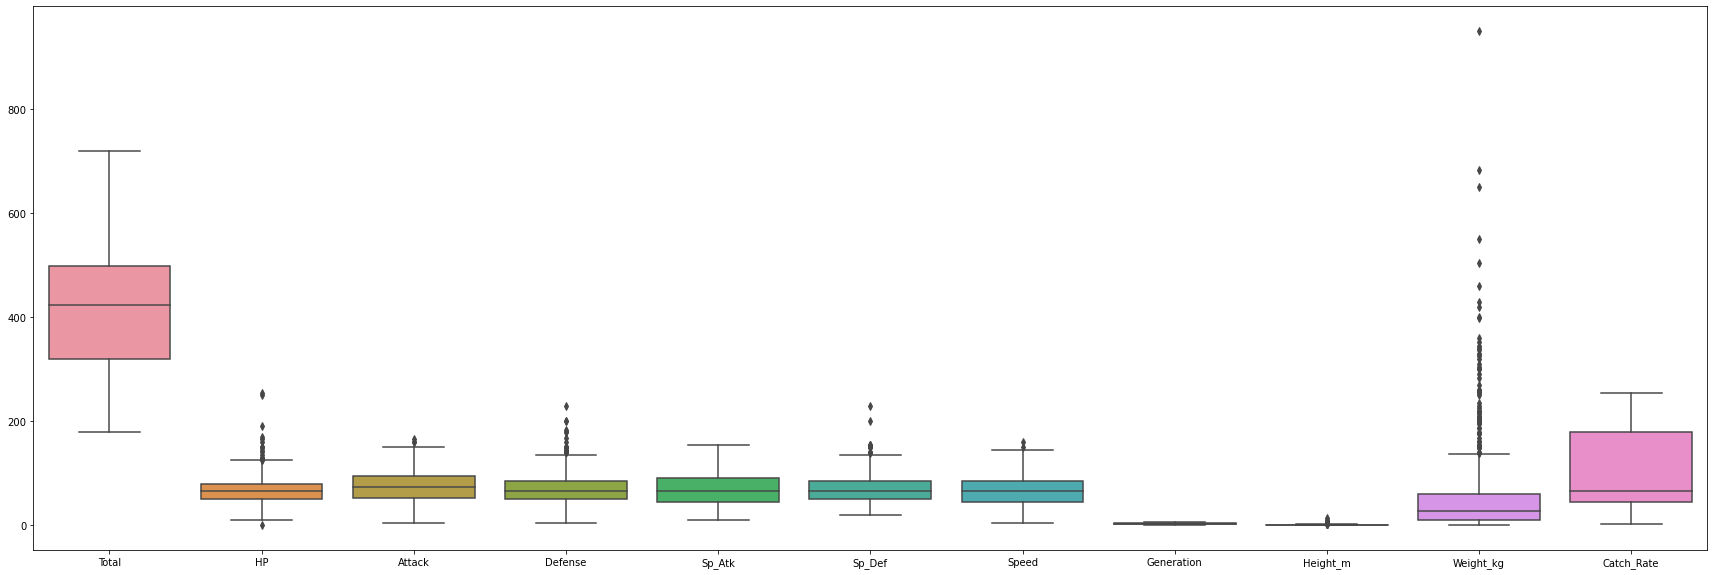

In [9]:
# Generating a box plot to view the numerical data

plt.figure(figsize = (30, 10))
# Taking all numerical data to plot
num_data = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Height_m', 'Weight_kg', 'Catch_Rate']]
# Generating a box plot to visualize the statistical summary 
sns.boxplot(data = num_data)

## 5. Dealing with Categorical Data

We will convert the categorical data into numerical. Why? (Someone answer this)


In [10]:
# The data before:
categorical_attributes = ['Type_1', 'Type_2', 'Egg_Group_1', 'Egg_Group_2', 'Color', 'Body_Style', 'isLegendary', 'hasMegaEvolution', 'hasGender']
pokemon[categorical_attributes].head()

,Type_1,Type_2,Egg_Group_1,Egg_Group_2,Color,Body_Style,isLegendary,hasMegaEvolution,hasGender
0,Grass,Poison,Monster,Grass,Green,quadruped,False,False,True
1,Grass,Poison,Monster,Grass,Green,quadruped,False,False,True
2,Grass,Poison,Monster,Grass,Green,quadruped,False,True,True
3,Fire,None,Monster,Dragon,Red,bipedal_tailed,False,False,True
4,Fire,None,Monster,Dragon,Red,bipedal_tailed,False,False,True


In [11]:
# Changing the categorical data to numbers.
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
pokemon[categorical_attributes] = enc.fit_transform(pokemon[categorical_attributes]).astype(int)

In [12]:
# Now they are all numerical
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    int32  
 3   Type_2            721 non-null    int32  
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    int32  
 13  Color             721 non-null    int32  
 14  hasGender         721 non-null    int32  
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    int32  
 1

In [13]:
# The data after:
pokemon[categorical_attributes].head()

,Type_1,Type_2,Egg_Group_1,Egg_Group_2,Color,Body_Style,isLegendary,hasMegaEvolution,hasGender
0,9,14,10,6,3,9,0,0,1
1,9,14,10,6,3,9,0,0,1
2,9,14,10,6,3,9,0,1,1
3,6,12,10,2,7,0,0,0,1
4,6,12,10,2,7,0,0,0,1


## 6. Dropping Unecessary Features

In [14]:
# Number and name are unnecessary because they will not help us classify the target attributes
pokemon = pokemon.drop(['Number','Name'], axis=1)
pokemon.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,9,14,318,45,49,49,65,65,45,1,...,3,1,0.875,10,6,0,0.71,6.9,45,9
1,9,14,405,60,62,63,80,80,60,1,...,3,1,0.875,10,6,0,0.99,13.0,45,9
2,9,14,525,80,82,83,100,100,80,1,...,3,1,0.875,10,6,1,2.01,100.0,45,9
3,6,12,309,39,52,43,60,50,65,1,...,7,1,0.875,10,2,0,0.61,8.5,45,0
4,6,12,405,58,64,58,80,65,80,1,...,7,1,0.875,10,2,0,1.09,19.0,45,0


## 7. Plotting the Correlation Matrix
We want to see the correlation between each attributes

<AxesSubplot:>

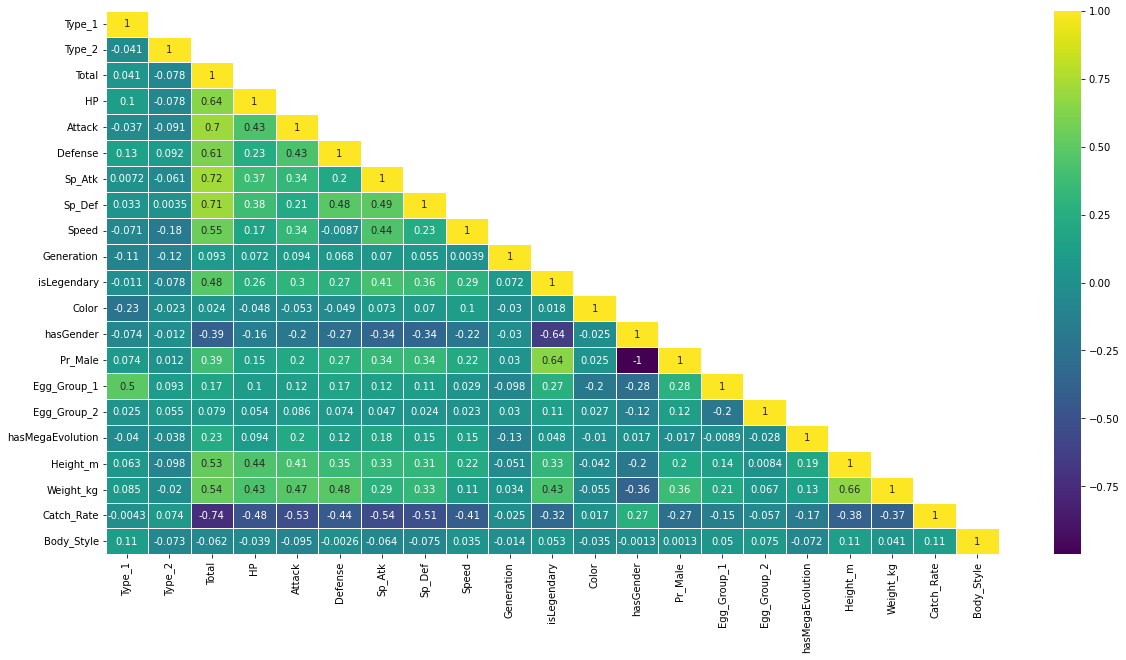

In [15]:
# We want to look at the correlations between each attribute

mask = np.array(pokemon.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(pokemon.corr(), mask = mask, annot=True, cmap='viridis', linewidths=.5)

# Week 3:

#### Binary Classification Function

In [16]:
from sklearn.preprocessing import StandardScaler
# Logistic regression to the training data
from sklearn.linear_model import LogisticRegression
# Creates the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def binaryClassification(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    
    ss_train_test = StandardScaler()
    logisticRegr = LogisticRegression() 
    logisticRegr.fit(ss_train_test.fit_transform(X_train), y_train)
    
    # Predicting based off of the test data
    predictions = logisticRegr.predict(ss_train_test.fit_transform(X_test))

    cm = confusion_matrix(y_test, predictions)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)

    # Accuracy of the classifier
    accuracy =  (TP + TN) / (TP + FP + TN + FN)

    print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

    return predictions,y_test


    

In [17]:
#Tried min max scaler instead of standard Scaler :
#Min max scaler got a lower answer, and had more false trues, than the StandardScaler..

# from sklearn import preprocessing
# min_max_scaler = preprocessing .MinMaxScaler()

# X_train_Binary = min_max_scaler.fit_transform(X_train)
# X_test_Binary = min_max_scaler.fit_transform(X_test)


### Binary Classification on Original Data (Without Feature Extraction)


In [18]:
# Original data without any feature extraction:
y = pokemon['isLegendary']
# Has all attributes besides isLegendary,because it is the class attri (shouldn't be normalized)
X = pokemon.drop('isLegendary', axis =1)

org_data_prediciton,org_y_test = binaryClassification(X, y)

True Positive(TP)  =  12
False Positive(FP) =  3
True Negative(TN)  =  202
False Negative(FN) =  0
Accuracy of the binary classifier = 0.986


## Pearson's R Feature Filtering

In [19]:
corr_matrix = pokemon.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
top_corr = corr_matrix["isLegendary"]
top_corr = abs(top_corr).sort_values(ascending=False).drop('isLegendary')
top_corr

Pr_Male             0.644736
hasGender           0.644714
Total               0.481837
Weight_kg           0.425219
Sp_Atk              0.409739
Sp_Def              0.360215
Height_m            0.326323
Catch_Rate          0.319302
Attack              0.302786
Speed               0.286082
Defense             0.274446
Egg_Group_1         0.271078
HP                  0.258926
Egg_Group_2         0.111683
Type_2              0.078308
Generation          0.071875
Body_Style          0.052852
hasMegaEvolution    0.047955
Color               0.018150
Type_1              0.010503
Name: isLegendary, dtype: float64

array([[<AxesSubplot:xlabel='Pr_Male', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='hasGender', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Total', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='Pr_Male'>],
       [<AxesSubplot:xlabel='Pr_Male', ylabel='hasGender'>,
        <AxesSubplot:xlabel='hasGender', ylabel='hasGender'>,
        <AxesSubplot:xlabel='Total', ylabel='hasGender'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='hasGender'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='hasGender'>],
       [<AxesSubplot:xlabel='Pr_Male', ylabel='Total'>,
        <AxesSubplot:xlabel='hasGender', ylabel='Total'>,
        <AxesSubplot:xlabel='Total', ylabel='Total'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='Total'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='Total'>],
       [<AxesSubplot:xlabel='Pr_Male', ylabel='Weight_kg'>,
        <AxesSubplot:xlabel='hasGender', ylabel='Weight_kg'>,
  

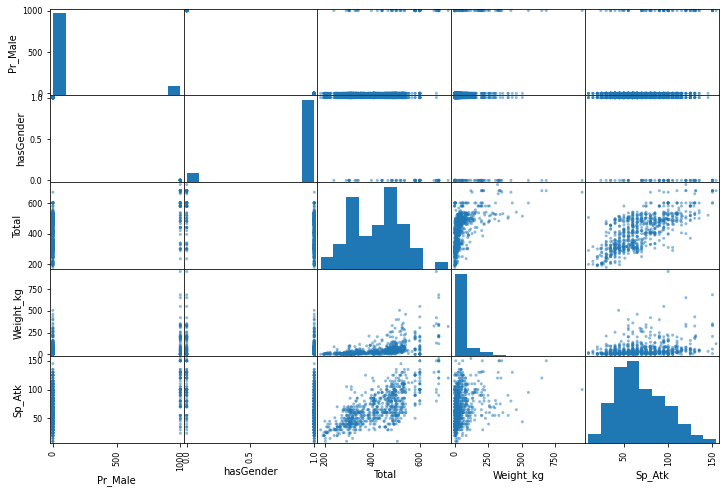

In [20]:
from pandas.plotting import scatter_matrix

# getting top 5 correlating attributes and visualising it
attributes = top_corr.index[:5].tolist()
scatter_matrix(pokemon[attributes], figsize=(12, 8))

In [21]:
# Selecting the top 9 features and then spliting them up to 3 ....
 

pokemon_pearsons_r = pokemon[top_corr.index[:2].tolist()]
pokemon_pearsons_r_2 = pokemon[top_corr.index[:5].tolist()]
pokemon_pearsons_r_3 = pokemon[top_corr.index[:10].tolist()]

print(pokemon_pearsons_r.columns.to_list())
print(pokemon_pearsons_r_2.columns.to_list())
print(pokemon_pearsons_r_3.columns.to_list())

['Pr_Male', 'hasGender']
['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk']
['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk', 'Sp_Def', 'Height_m', 'Catch_Rate', 'Attack', 'Speed']


In [22]:
for x in range(1,21):
    print(x,": ")
    # print("Features used: ", pokemon[top_corr.index[:x].tolist()])
    binaryClassification(pokemon[top_corr.index[:x].tolist()],pokemon["isLegendary"])
    print("--------------")
    

1 : 
True Positive(TP)  =  11
False Positive(FP) =  13
True Negative(TN)  =  192
False Negative(FN) =  1
Accuracy of the binary classifier = 0.935
--------------
2 : 
True Positive(TP)  =  11
False Positive(FP) =  13
True Negative(TN)  =  192
False Negative(FN) =  1
Accuracy of the binary classifier = 0.935
--------------
3 : 
True Positive(TP)  =  11
False Positive(FP) =  2
True Negative(TN)  =  203
False Negative(FN) =  1
Accuracy of the binary classifier = 0.986
--------------
4 : 
True Positive(TP)  =  11
False Positive(FP) =  2
True Negative(TN)  =  203
False Negative(FN) =  1
Accuracy of the binary classifier = 0.986
--------------
5 : 
True Positive(TP)  =  10
False Positive(FP) =  3
True Negative(TN)  =  202
False Negative(FN) =  2
Accuracy of the binary classifier = 0.977
--------------
6 : 
True Positive(TP)  =  11
False Positive(FP) =  3
True Negative(TN)  =  202
False Negative(FN) =  1
Accuracy of the binary classifier = 0.982
--------------
7 : 
True Positive(TP)  =  10
Fa

array([[<AxesSubplot:xlabel='Pr_Male', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='hasGender', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Total', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='Pr_Male'>],
       [<AxesSubplot:xlabel='Pr_Male', ylabel='hasGender'>,
        <AxesSubplot:xlabel='hasGender', ylabel='hasGender'>,
        <AxesSubplot:xlabel='Total', ylabel='hasGender'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='hasGender'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='hasGender'>],
       [<AxesSubplot:xlabel='Pr_Male', ylabel='Total'>,
        <AxesSubplot:xlabel='hasGender', ylabel='Total'>,
        <AxesSubplot:xlabel='Total', ylabel='Total'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='Total'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='Total'>],
       [<AxesSubplot:xlabel='Pr_Male', ylabel='Weight_kg'>,
        <AxesSubplot:xlabel='hasGender', ylabel='Weight_kg'>,
  

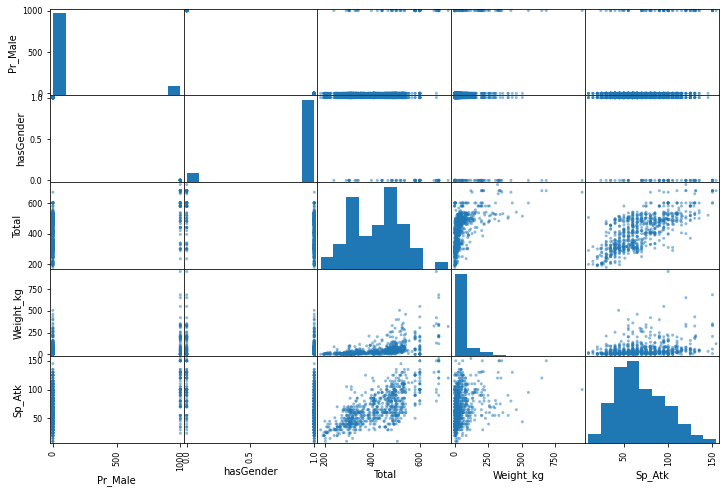

In [23]:
attributes = top_corr.index[:5].tolist()
scatter_matrix(pokemon[attributes], figsize=(12, 8))

### Binary Classification on Pearsons R data (1st Feature Extraction)


<h5>Binary Classification Using the Top 3 Features</h5>

In [24]:
#Features extracted using pearsons r..
y = pokemon['isLegendary']
# Has only the top 3 features that has been extracted using pearsons r.
X = pokemon_pearsons_r
print("features that are being used: ", X.keys().tolist())
print("---------")
pr_prediction,pr_y_test = binaryClassification(X,y)

features that are being used:  ['Pr_Male', 'hasGender']
---------
True Positive(TP)  =  11
False Positive(FP) =  13
True Negative(TN)  =  192
False Negative(FN) =  1
Accuracy of the binary classifier = 0.935


<h5>Binary Classification Using the Top 7 Features</h5>

In [25]:
#Features extracted using pearsons r..
y = pokemon['isLegendary']
# Has only the top 5 features that has been extracted using pearsons r.
X = pokemon_pearsons_r_2
print("features that are being used: ", X.keys().tolist())
print("---------")
pr2_prediction,pr2_y_test = binaryClassification(X,y)

features that are being used:  ['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk']
---------
True Positive(TP)  =  10
False Positive(FP) =  3
True Negative(TN)  =  202
False Negative(FN) =  2
Accuracy of the binary classifier = 0.977


<h5>Binary Classification Using the Top 10 Features</h5>

In [26]:
# Features extracted using pearsons r..
y = pokemon['isLegendary']
# Has only the top 7 features that has been extracted using pearsons r.
X = pokemon_pearsons_r_3

print("features that are being used: ", X.keys().tolist())
print("---------")
pr3_prediction,pr3_y_test = binaryClassification(X,y)

features that are being used:  ['Pr_Male', 'hasGender', 'Total', 'Weight_kg', 'Sp_Atk', 'Sp_Def', 'Height_m', 'Catch_Rate', 'Attack', 'Speed']
---------
True Positive(TP)  =  11
False Positive(FP) =  2
True Negative(TN)  =  203
False Negative(FN) =  1
Accuracy of the binary classifier = 0.986


## Embedded Methods

In [27]:
# This is wrong, this is using the normal data (all attrib in X), instead of actually using the extracted attri in X.

y = pokemon['isLegendary']
# Has all attributes besides isLegendary,because it is the class attri (shouldn't be normalized)
X = pokemon.drop('isLegendary', axis =1 )

X_train_embedded, X_test_embedded, y_train_embedded, y_test_embedded = train_test_split(X, y, test_size=0.3, random_state=10)


In [28]:
# train model using lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_embedded, y_train_embedded)

# perform feature selection
pokemon_embedded_methods = [feature for feature, weight in zip(X.columns.values, lasso.coef_) if weight != 0]
print("Features that have been selected are: ",pokemon_embedded_methods)
print("---------")
em_prediction,em_y_test = binaryClassification(pokemon[pokemon_embedded_methods],y)


Features that have been selected are:  ['Total', 'Pr_Male', 'Weight_kg']
---------
True Positive(TP)  =  11
False Positive(FP) =  2
True Negative(TN)  =  203
False Negative(FN) =  1
Accuracy of the binary classifier = 0.986


In [29]:
#mutual information
#chi square.

## Mutual Information

In [30]:
# preparing data for mutual information
from sklearn import preprocessing
Data = pokemon.drop(columns = 'isLegendary').values
target = pokemon['isLegendary']
Data = preprocessing.MinMaxScaler().fit_transform(Data)
target = preprocessing.LabelEncoder().fit_transform(target)

In [31]:
# The code below returns the indices of the 5 features that have the highest mutual information value
from sklearn import feature_selection as fs
num_features = 5
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = pokemon.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['Total', 'Weight_kg', 'Pr_Male', 'hasGender', 'Color'],
      dtype=object)

In [32]:
# Gives the scores of the values we got before
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.1940609 , 0.18059295, 0.17120688, 0.12904483, 0.10197974])

In [33]:
# Function to plot a graph to plot the feature selection and show correspondance to different feature selection methods
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances for legendary')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

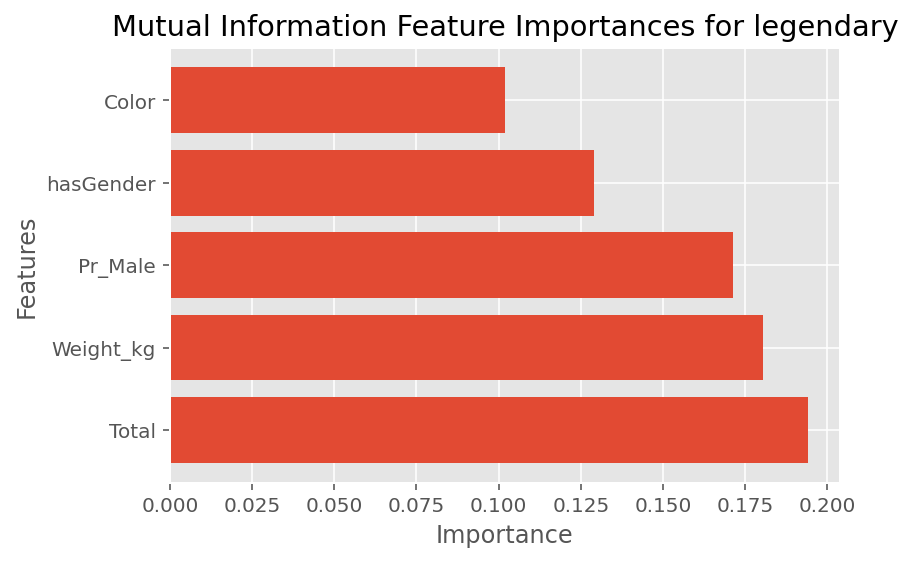

In [34]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

In [35]:
# A method used during valadiation where we use stratified 5-fold cross-validation with 3 repetitions and set the random state to 999
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)
# Specifies scoring metric
scoring_metric = 'accuracy'

In [36]:
# Uses the decision tree classifier with default values.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=999)

In [37]:
# Evaluate the performance of these 5 features for mutual Information
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.988

## Chi Squared

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = pokemon.drop(['isLegendary'], axis=1)
y = pokemon['isLegendary']


# 2 best features
X_chi = SelectKBest(chi2, k = 2)
X_kbest = X_chi.fit_transform(X, y)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)
print('Features reduced to:', X_chi.get_feature_names_out())
chi_prediciton, chi_y_test = binaryClassification(X_kbest, y)

Original number of features: (721, 20)
Reduced number of features: (721, 2)
Features reduced to: ['Pr_Male' 'Weight_kg']
True Positive(TP)  =  8
False Positive(FP) =  3
True Negative(TN)  =  202
False Negative(FN) =  4
Accuracy of the binary classifier = 0.968


In [39]:
# 5 best features
X_chi = SelectKBest(chi2, k = 5)
X_kbest = X_chi.fit_transform(X, y)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)
print('Features reduced to:', X_chi.get_feature_names_out())
chi2_prediction,chi2_y_test =binaryClassification(X_kbest, y)

Original number of features: (721, 20)
Reduced number of features: (721, 5)
Features reduced to: ['Total' 'Sp_Atk' 'Pr_Male' 'Weight_kg' 'Catch_Rate']
True Positive(TP)  =  11
False Positive(FP) =  3
True Negative(TN)  =  202
False Negative(FN) =  1
Accuracy of the binary classifier = 0.982


In [40]:
# 10 best features
X_chi = SelectKBest(chi2, k = 10)
X_kbest = X_chi.fit_transform(X, y)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)
chi10 = X_chi.get_feature_names_out()
print('Features reduced to:', chi10)
chi3_prediction,chi3_y_test = binaryClassification(X_kbest, y)

Original number of features: (721, 20)
Reduced number of features: (721, 10)
Features reduced to: ['Total' 'HP' 'Attack' 'Defense' 'Sp_Atk' 'Sp_Def' 'Speed' 'Pr_Male'
 'Weight_kg' 'Catch_Rate']
True Positive(TP)  =  11
False Positive(FP) =  3
True Negative(TN)  =  202
False Negative(FN) =  1
Accuracy of the binary classifier = 0.982


## Week 3 Conclusions
- What kind of information did you learn, as a result of the above experiments?
- What features are more important/reliable for the class? Less reliable?

# Week 4 

### ROC curve 

In [41]:
X = pokemon.drop(['isLegendary'], axis=1)
y = pokemon['isLegendary']

#Split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#Creating objects for classifier and training the classifier with the train split of the dataset
clf_tree = DecisionTreeClassifier()
#Setting max iteration super high to fix converging too fast
clf_reg = LogisticRegression(max_iter=1200000)

clf_tree.fit(X_train, y_train)
clf_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1200000)

In [42]:
#Using the models on test dataset
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

In [43]:
#Creating False and True Positive Rates
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [44]:
#Printing Scores
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.9423857868020303
roc_auc_score for Logistic Regression:  0.9883248730964467


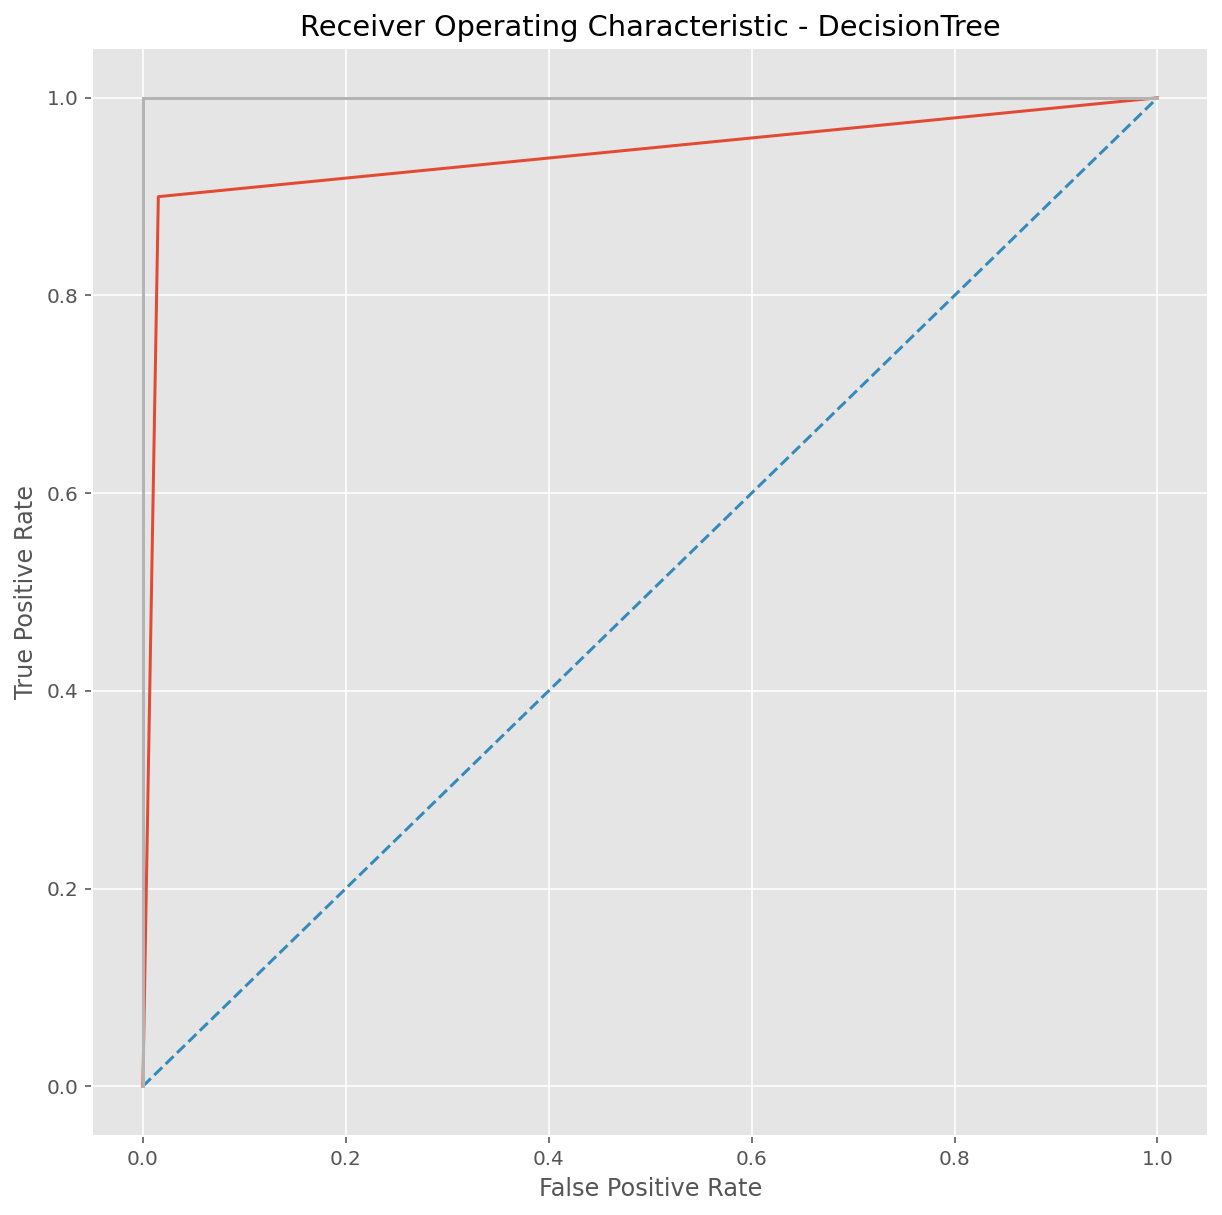

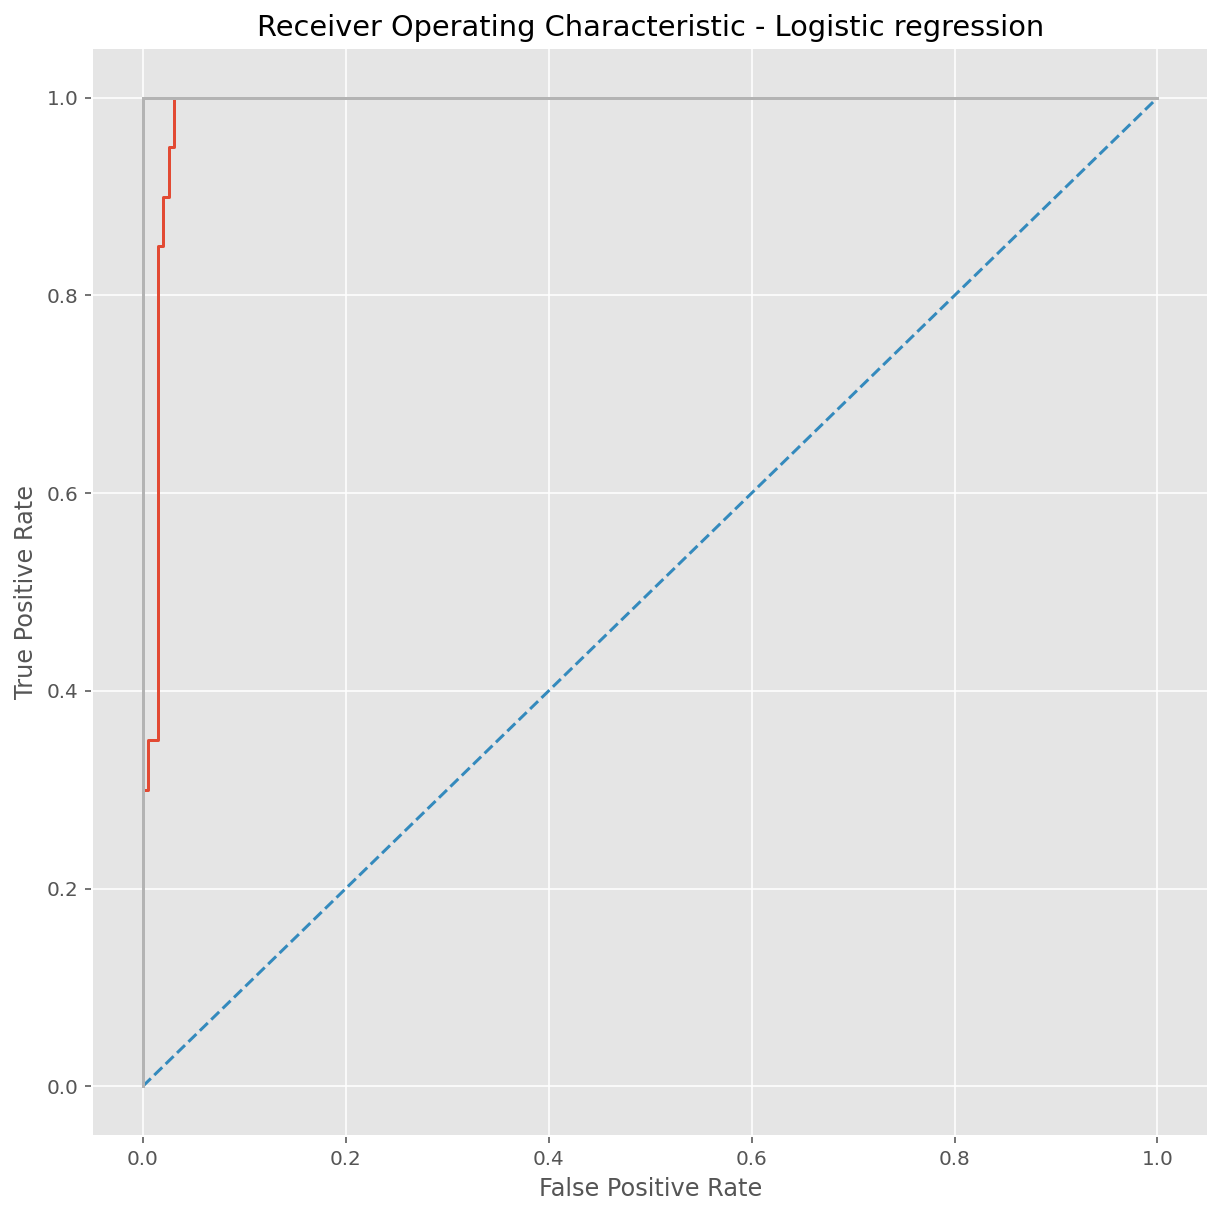

In [45]:
#Ploting ROC Curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Evaluation Metrics Func:

In [46]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def evalMetrics(y_test,predictions,name):
    #importing accuracy_score, precision_score, recall_score, f1_score
    print(name)
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))
    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predictions, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predictions, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predictions, average='weighted')))

In [47]:
evalMetrics(pr_prediction,pr_y_test,"Pearsons R: ")
print('\nClassification Report\n')
print(classification_report(pr_prediction,pr_y_test, target_names=['is Legendary','not Legendary']))

Pearsons R: 

Accuracy: 0.94

Weighted Precision: 0.93
Weighted Recall: 0.94
Weighted F1-score: 0.93

Classification Report

               precision    recall  f1-score   support

 is Legendary       0.94      0.99      0.96       193
not Legendary       0.92      0.46      0.61        24

     accuracy                           0.94       217
    macro avg       0.93      0.73      0.79       217
 weighted avg       0.93      0.94      0.93       217

